## 1.2.1 Fill missing data with pandas

In [31]:
# Import car sales dataframe with missing values
import pandas as pd
import numpy as np 
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [13]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [15]:
# Create features
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

Number of missing X values:
Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64


In [17]:
# Create labels
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")

Number of missing y values: 50


In [1]:
# Let's convert the categorical columns to one hot encoded (code copied from above)
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # "instantating the normal nature of the fraction of sprase coloumn to alwayds be dense instead of sparse:
#"Even if every column is sparse, give me a dense array."

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

NameError: name 'X_missing' is not defined

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: Input y contains NaN.

In [33]:
pd.DataFrame(transformed_X_missing)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35820.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,215883.0


In [35]:
car_sales_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
car_sales_missing["Make"].fillna("missing", inplace = True)
car_sales_missing["Colour"].fillna("missing", inplace = True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)
car_sales_missing["Doors"].fillna(4, inplace = True)

C:\Users\EZEEN\AppData\Local\Temp\ipykernel_24628\1934931413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace = True)
C:\Users\EZEEN\AppData\Local\Temp\ipykernel_24628\1934931413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
car_sales_missing.dropna(inplace=True)

In [51]:
car_sales_missing.isna().sum(), print(f"number of rows in dataset: {len(car_sales_missing)}")

number of rows in dataset: 950


(Make             0
 Colour           0
 Odometer (KM)    0
 Doors            0
 Price            0
 dtype: int64,
 None)

In [53]:
# Create features
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

# Create labels
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")


Number of missing X values:
Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64
Number of missing y values: 0


In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [61]:
# Split data into training and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f"{model.score(X_test, y_test)*100 :.2f}%")

22.01%


## Option 2: Fill missing values with Scikit-Learn

In [70]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [74]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## 2. Choosing the right  estimator/algorithm for your problem 
The Estimator/Algorithm Tree : https://scikit-learn.org/stable/machine_learning_map.html



Fetch california housing Dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [141]:
##2.1 Picking a machine learning model for regression problem
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [143]:
import pandas as pd
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"] ) # it's a dictionary so you have to call the housing and input the key
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [145]:
import numpy as np
import pandas as pd
housing_df.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


In [147]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
housing_df = Scaler.fit_transform(housing_df)
housing_df = pd.DataFrame(housing_df, columns = housing["feature_names"] ) # it's a dictionary so you have to call the housing and input the key
housing_df.describe().round(2)




In [149]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [151]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [153]:
housing_df["Target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis =1)
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Trying differnt Models on the housing Dataset
## 1. Ridge
## 2. LassoLars
## 3. ElasticNetCV
## 4. SVR
## 5. RandomForestRegressor


In [155]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#set up random seed to replicate ourr spliting as a random constant
np.random.seed(42)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] #median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2
                                                    )
#instantiate and fit the model(on the training set)
model = Ridge()
model.fit(x_train, y_train)

#Check the score of the model (on the test set)
print(f" Score : {model.score(x_test,y_test) *100 :.2f}% ") #how predictive are the features of the target values (coefficient of determination R^2)

 Score : 57.59% 


In [157]:
import numpy as np
from sklearn.linear_model import  LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#set up random seed to replicate ourr spliting as a random constant
np.random.seed(42)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] #median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2
                                                    )
#instantiate and fit the model(on the training set)
model = LassoLars()
model.fit(x_train, y_train)

#Check the score of the model (on the test set)
print(f" Score : {model.score(x_test,y_test) *100 :.2f}% ") #how predictive are the features of the target values (coefficient of determination R^2)

 Score : 28.42% 


In [159]:
import numpy as np
from sklearn.linear_model import  ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#set up random seed to replicate ourr spliting as a random constant
np.random.seed(42)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] #median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2
                                                    )
#instantiate and fit the model(on the training set)
model = ElasticNetCV()
model.fit(x_train, y_train)

#Check the score of the model (on the test set)
print(f" Score : {model.score(x_test,y_test) *100 :.2f}% ") #how predictive are the features of the target values (coefficient of determination R^2)

 Score : 57.19% 


In [135]:
model.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [163]:
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#set up random seed to replicate ourr spliting as a random constant
np.random.seed(42)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] #median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2
                                                    )
#instantiate and fit the model(on the training set)
model = SVR()
model.fit(x_train, y_train)

#Check the score of the model (on the test set)
print(f" Score : {model.score(x_test,y_test) *100 :.2f}% ") #how predictive are the features of the target values (coefficient of determination R^2)

 Score : -1.65% 


In [162]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#set up random seed to replicate ourr spliting as a random constant
np.random.seed(42)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] #median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2
                                                    )
#instantiate and fit the model(on the training set)
model = RandomForestRegressor()
model.fit(x_train, y_train)

#Check the score of the model (on the test set)
print(f" Score : {model.score(x_test,y_test) *100 :.2f}% ") #how predictive are the features of the target values (coefficient of determination R^2)

 Score : 80.67% 


Ensemble methods combine the predictions of several base estimators/models to make better decision
sklearn models can be found here: https://scikit-learn.org/stable/machine_learning_map.html

## Sklearn Algorithm Cheat Sheet

![_](Sklearn-algorithm-cheat-sheet.png)

In [176]:
heart_disease =  pd.read_csv("heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Consulting the map and it says try linearSVC

In [191]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
np.random.seed(42)

x =heart_disease.drop("target",axis=1) 
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                test_size= 0.2)

clf = LinearSVC()
clf.fit(x_train, y_train)

print(f" Score : {clf.score(x_test, y_test) *100 :.2f}% ") 

 Score : 86.89% 


In [193]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [195]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

x =heart_disease.drop("target",axis=1) 
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                test_size= 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

print(f" Score : {clf.score(x_test, y_test) *100 :.2f}% ") #making predictions (y_preds) and comparing to y_test to give an accurrcy score


 Score : 85.25% 


## NOTED
Tidbit :
    1. if you have structured data use ensembles methods (table data)
    2. if you have unstructured data use deep larning or transfer learning (images, audio or texts)

## 3.2 make predictions using a machine learning model
there are two ways to make precitions:
1. `predict()`
2. `predict_proba()`
   

In [199]:
clf.predict(np.array([1,7,3,4,53])) #won't work

C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  7.  3.  4. 53.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [203]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [283]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [287]:
np.array([y_test]).shape

(1, 61)

In [215]:
print(f"comparison score: {np.mean(y_pred == y_test) *100:.2f}%" ) #the average number of correct predictions 

comparison score: 85.25%


In [265]:
test = pd.DataFrame(y_pred == y_test)
test.value_counts()
# since 52 Trues on the com,parison of y_pred and y_test , 
# the score/comparison score is 52(total number of True values in the truth table)/61(total number of elements in the truth table)
# which is equal to = 0.8525

target
True      52
False      9
Name: count, dtype: int64

In [269]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8524590163934426


 Make predictions with `predictproba()`

In [295]:
clf.predict_proba(x_test[:5])
# returns probabilities of a classification label
# returns the probabiltiy of the label being true or false (0 or 1)
# e.g first row (row[0])indicates the model having 0.89(89%) probability of the result being 0 and a 0.11(11%) probability of the result being 1
# so 0 is chosen as the prediction of x_test for row[0]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

`pridict_proba()` returns probabilities of a classification label

it returns the probabiltiy of the label being true or false (0 or 1)
e.g first row `(row[0])` indicates the model having `0.89 (89%)` probability of the result being 0 and a` 0.11 (11%)` probability of the result being 1
so 0 is chosen as the prediction of x_test for row[0]

In [302]:
clf.predict(x_test[:5]) #force the model to bring out one label (0 or 1)

array([0, 1, 1, 0, 1], dtype=int64)

In [1]:
housing

NameError: name 'housing' is not defined

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing_df = pd.DataFrame(housing["data"], columns= housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
housing_df["Target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = housing_df.drop("Target", axis =1)
y =housing_df["Target"]
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred


array([0.4939   , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67781  ])

In [12]:
len(y_pred), y_pred[:10]

(4128,
 array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
        2.3431   , 1.66311  , 2.47489  , 4.8344779]))

In [56]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # designed for classification tasks[0 and 1] 
#not continous target values {floates e.g 0.85]


ValueError: continuous is not supported

## Evualate the Model (testing)

In [ ]:
print(f"comparison score: {np.mean(y_pred == y_test) *100:.2f}%" )

In [16]:
model.score(x_test,y_test)

0.806652667101436

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test) # an avaerage differnece of each of the predictions
#made from our model : mean[true values - predictions]

0.32656738464147306

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.25336408094921037

In [22]:
from sklearn.metrics import r2_score #supports floating target values
r2 = r2_score(y_test, y_pred) #It tells you the proportion of the variance in the target variable that is predictable
#from the independent variables : sum of all data {1 - [(true values -prediction)^2 / (true - mean(target)^2)]}
print(r2)


0.806652667101436


## Evaluating a machine learning model

threee ways to evalute an sklear model
1. `score()` method
2. scoring parameter
3. problem specific metric functions

In [114]:
import pandas as pd
heart_disease =  pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = heart_disease.drop("target",axis=1) 
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                test_size= 0.2)

clf = RandomForestClassifier(n_estimators= 1000)
clf.fit(x_train, y_train)



RandomForestClassifier(n_estimators=1000)

In [118]:
print(f" Score : {clf.score(x_test, y_test) *100 :.2f}% ") 


 Score : 86.89% 


In [120]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x = heart_disease.drop("target",axis=1) 
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                test_size= 0.2)

clf = RandomForestClassifier(n_estimators= 1000)
clf.fit(x_train, y_train)



RandomForestClassifier(n_estimators=1000)

In [122]:
score = clf.score(x_test, y_test) *100
print(f" Score : {score}% ") 


 Score : 86.88524590163934% 


In [84]:
cross_val_score(clf, x , y , cv =10) # splits, fits, trains and tests the data in different orders

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.86666667, 0.76666667, 0.83333333, 0.73333333, 0.8       ])

In [124]:
CV = np.mean(cross_val_score(clf, x , y , cv =10 , scoring=None)) *100
print(f" Cross Validation Score : {CV}% ") 

 Cross Validation Score : 82.81720430107526% 


# if scoring parameter set to None then 
# the secoring parametr for classifer would be mean accuracy i.e `score()`

## 4.2 Classification model evualation metrics
1. accuracy
2. area under ROC curve
3. confusion matrix
4. Classicfication report

## Acurraccy

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x = heart_disease.drop("target",axis=1) 
y = heart_disease["target"]

# x_train, x_test, y_train, y_test = train_test_split(x, y, 
#                 test_size= 0.2)


clf = RandomForestClassifier(n_estimators= 1000)
# clf.fit(x_train, y_train)
cross_val_Score = np.mean(cross_val_score(clf, x, y ,cv=10))
cross_val_score(clf, x, y ,cv=10)


array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.8       ])

In [10]:
print(f"Heart Disease Cross_Validation Accuracy Score: {cross_val_Score *100:.2f}%" )

Heart Disease Cross_Validation Accuracy Score: 82.81%


## Area Under ROC (Reciever Operating Characteristics [AUC/ROC]) Curve

Roc curves are a comparison of a model's `true positiive rate (tpr)` versus a models `false positive rate (fpr)`

* True Positve = model prdicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predits 0 when truth is 1



In [158]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1) 
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size= 0.2)

clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [160]:
y_prob = clf.predict_proba(x_test)
print("  [ 0(probability of a False) , 1(Probability of a True) ]")
y_prob[:10]


  [ 0(probability of a False) , 1(Probability of a True) ]


array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ],
       [0.145, 0.855],
       [0.286, 0.714],
       [0.948, 0.052],
       [0.967, 0.033],
       [0.471, 0.529]])

In [162]:
## splice the orignal array (y_prob)to get a new array that has all the rows of the 
# second coloumn [1] (probability of a True)

#                       all the rows of the dataset
#                       ,with the second coloumn [1]

y_positive_prob = y_prob[:, 1]

#get the first 10 elemnts and lenght of the new positive probability array
y_positive_prob[:10], len(y_positive_prob)

(array([0.106, 0.565, 0.545, 0.129, 0.77 , 0.855, 0.714, 0.052, 0.033,
        0.529]),
 61)

In [164]:
# lculate fpr, tpr, thresholds with the roc_curve
tpr, fpr, threshold = roc_curve(y_test, y_positive_prob)


In [166]:
tpr, len(tpr)


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.10344828, 0.10344828, 0.13793103,
        0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
        0.72413793, 0.72413793, 1.        ]),
 18)

In [168]:
fpr

array([0.     , 0.03125, 0.3125 , 0.375  , 0.5    , 0.53125, 0.71875,
       0.71875, 0.75   , 0.75   , 0.8125 , 0.8125 , 0.90625, 0.90625,
       0.96875, 0.96875, 1.     , 1.     ])

In [144]:
threshold

array([  inf, 0.979, 0.851, 0.848, 0.831, 0.746, 0.741, 0.735, 0.667,
       0.65 , 0.648, 0.627, 0.518, 0.51 , 0.507, 0.5  , 0.393, 0.285,
       0.026])

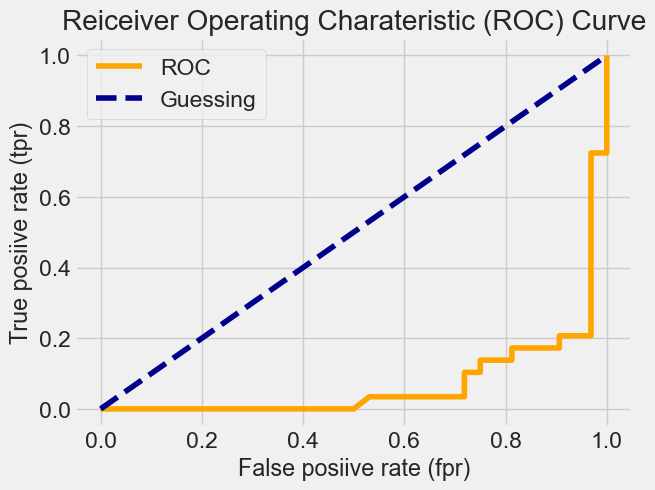

AUC SCORE: 92.94%


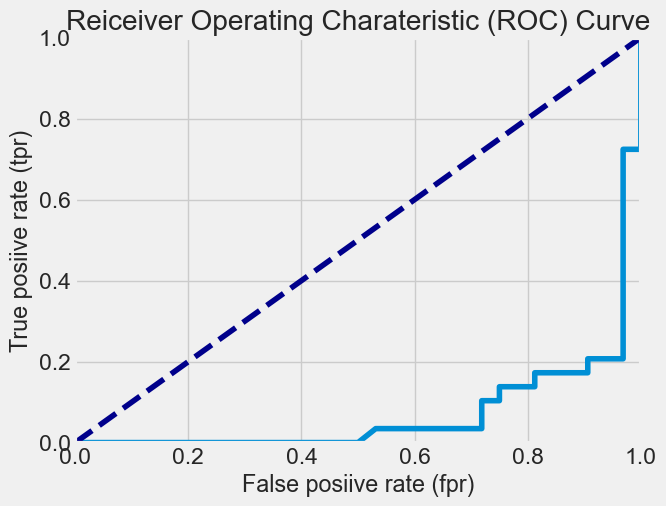

In [170]:
# create a function for plotting curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    plt.plot(fpr, tpr, color = "orange", label ="ROC")
    
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle= "--", label="Guessing")
    
    plt.xlabel("False posiive rate (fpr)")
    plt.ylabel("True posiive rate (tpr)")
    plt.title("Reiceiver Operating Charateristic (ROC) Curve")
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr, tpr)




def plot_roc_curve_2(fpr,tpr): # using OO method
    # oo method from scratch 
    fig, ax = plt.subplots(figsize = (6.5, 5))
    
    # plot the data
    curve = ax.plot(fpr, tpr)# legend_element!
    line = ax.plot([0, 1], [0, 1], color = "darkblue", linestyle= "--", label="Guessing")

    
    #CUSTOMIZE THE PLOT 
    ax.set(title ="Reiceiver Operating Charateristic (ROC) Curve",
           xlabel = "False posiive rate (fpr)",
           ylabel = "True posiive rate (tpr)"
          );
    # removing the boarder from x and y figure
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    
    # # Add legend
    # ax.legend(*scatter.legend_elements(), title ="");
    
    # # Add a horizontal line 
    # ax.axhline(over_50["chol"].mean(), ls = ':');

plot_roc_curve_2(fpr, tpr);

from sklearn.metrics import roc_auc_score
print(f"AUC SCORE: {roc_auc_score(y_test, y_positive_prob)* 100:.2f}%")
    
        




    

In [30]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [148]:
plt.style.use("fivethirtyeight")

In [174]:
from sklearn.metrics import roc_auc_score

print(f"AUC SCORE: {roc_auc_score(y_test, y_positive_prob)* 100:.2f}%")


AUC SCORE: 92.94%


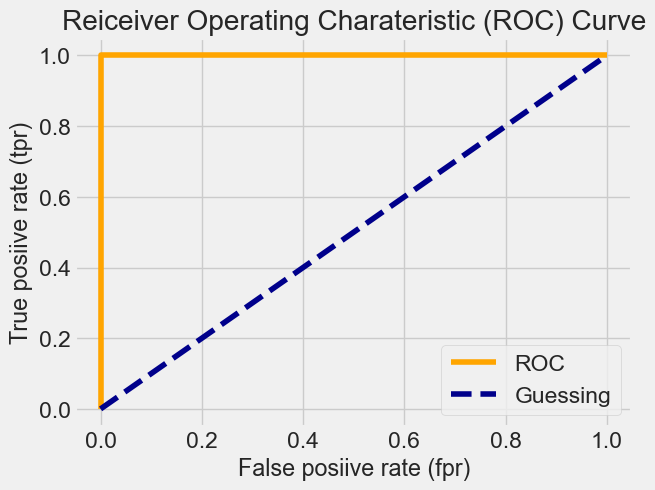

AUC SCORE: 100.00%


In [176]:
#plot a perfect ROC cuve and AUC score
fpr, tpr ,threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)
print(f"AUC SCORE: {roc_auc_score(y_test, y_test)* 100:.2f}%")




**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppossed to predict in essence, give you and ideas of wheere the model is getting confused 

In [178]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [180]:
# visulalize confusion matrix with pd.crosstab()
#comparison of y_test ana y_pred
pd.crosstab(y_test,
            y_pred,
            rownames= ["Actual labels"],
            colnames= ["Predicted lables"]
                
    
)


Predicted lables,0,1
Actual labels,,
0,24,5
1,3,29



* True Positve = model prdicts 1 when truth is 1 --(24)
* False Positive = model predicts 1 when truth is 0 --(7)
* @

* True Negative = model predicts 0 when truth is 0 --(25)
* False Negative = model predits 0 when truth is 1--(5)

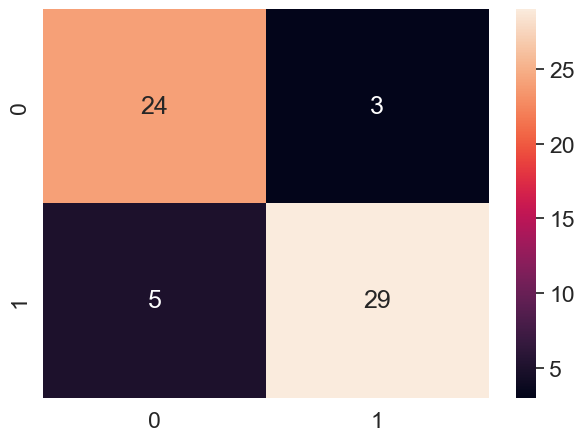

In [182]:
import seaborn as sns
sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_pred, y_test)

sns.heatmap(conf_mat, annot=True);




In [172]:
#how to install a conda package on jupyter notbook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\EZEEN\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       haa95532_0         130 KB
    certifi-2025.1.31          |  py312haa95532_0         164 KB
    conda-24.11.3              |  py312haa95532_0         1.2 MB
    openssl-3.0.16             |       h3f729d1_0         7.8 MB
    seaborn-0.13.2             |  py312haa95532_2         723 KB
    ------------------------------------------------------------
                                           Total:        10.0 MB

The following packages will be UPDATED:

  ca-certificates                      2024.9.24-haa95532_0 --> 2025.2.25-haa95532_0 
  certifi                         2024.8.30-py312haa95532_0 --> 2025.1.31-py312haa

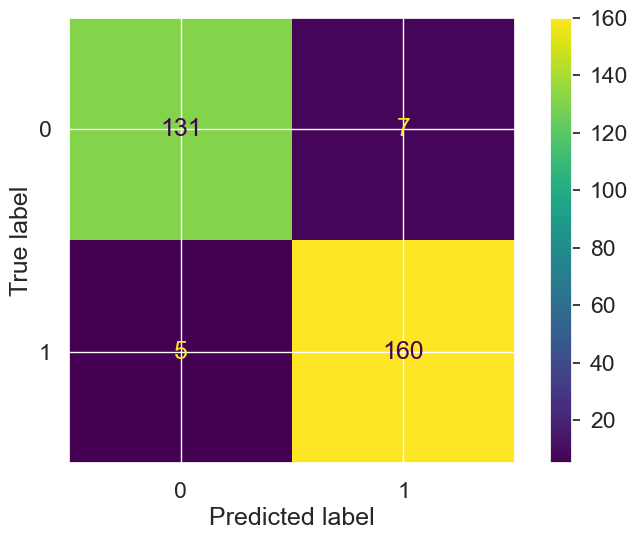

In [196]:
from sklearn.metrics import ConfusionMatrixDisplay

#                                                   cap "X" and small "y" to work
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x , y=y)

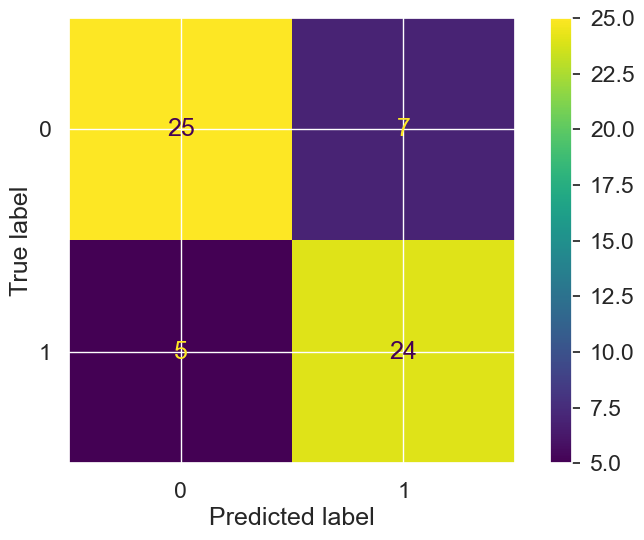

In [198]:
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred= y_pred)

## Classification Report 

In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.83      0.80        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [219]:
##scenerio where in 10000 people one has heart disease but the model didn't see the one person
disease_true = np.zeros(10000)
len(disease_true)
disease_true[0] = 1 #only one positive #corrected to get only one person that has disease in the population

disease_preds = np.zeros(10000) # what the model predits 
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True)) #output as dictionary


C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [227]:
pd.crosstab(disease_true,
            disease_preds,
            rownames= ["Actual labels"],
            colnames= ["Predicted lables"]
           )
    

Predicted lables,0.0
Actual labels,
0.0,9999
1.0,1


## IMPORTANT SUMMARY
* *Accuracy* is a good measure to start with if all classes are balanced (e.g. same amount of samples * * which are labelled with 0 or 1)
* *Precision* and *recall* become more important when classes are imbalanced.
  * If false positive predictions are worse than false negatives, aim for higher precision.
  * If false negative predictions are worse than false positives, aim for higher recall.
* *F1-score* is a combination of precision and recall

## 4.3 Regression model evualation metrics
1. R sqaured Score (R2)
2. Mean Sqaured Erro (MSE)
3. Mean Absolute Error (MAE)


In [243]:

y_test_mean = np.full(len(y_test), y_test.mean())
# y_test_mean
y_test

301    0
231    0
58     1
149    1
228    0
      ..
162    1
55     1
159    1
61     1
143    1
Name: target, Length: 61, dtype: int64

In [199]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [201]:
housing_df = pd.DataFrame(housing["data"], columns=  housing["feature_names"])
housing_df[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [207]:
housing_df["Target"] = housing["target"]

In [209]:
housing_df[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

x = housing_df.drop("Target", axis =1)
y = housing_df["Target"]

x_train, x_test, y_train,y_test = train_test_split(x, y, 
                                                   test_size =0.2)

clf = RandomForestRegressor()
clf.fit(x_train, y_train)



RandomForestRegressor()

In [281]:
clf.score(x_test, y_test)


0.806652667101436

In [212]:
y_preds= clf.predict(x_test)

r2_score(y_test, y_preds)

0.806652667101436

In [319]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [223]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [219]:
y_test_mean = np.full(len(y_test), y_test.mean()) # create a new y np array that contains a 
# the value of the mean form the y_test in every row and also with the same amount of rows of the y_test

print(f" R2 score of mean prediction: {r2_score(y_true = y_test, y_pred = y_test_mean)*100:.2f} %")

 R2 score of mean prediction: 0.00 %


In [221]:
print(f" R2 score of same predictions: {r2_score(y_true = y_test, y_pred = y_test)*100:.2f} %")

 R2 score of same predictions: 100.00 %


## Mean Absolute Error (MAE) & Mean sqaured Error (MSE)

MAE is the average of the absolute difference between preditions and actual values
(it gives an idea of how wrong your models predicts are ), The smaller the MAE, the better your model is at making predictions.

MSE is the avearage of the squared Error, it can be affected by an outlier ( MSE is useful when you really want to penalize big mistakes.

)


*NOTE*: 
It's in the same scale as the `target` lable ($100,000), because it's the average absolute difference between prediction and true value

In [235]:
from sklearn.metrics import mean_absolute_error
y_preds = clf.predict(x_test)
mae = mean_absolute_error(y_test, 
                          y_preds)
mae

0.32656738464147306

In [261]:
df = pd.DataFrame(data ={"actual values": y_test, "predicted values": y_preds})
df["difference"] = df["predicted values"] - df["actual values"]
df.reset_index(drop = True, inplace= True)
df.head(10)

,actual values,predicted values,difference
0,0.47700,0.493900,0.016900
1,0.45800,0.754940,0.296940
2,5.00001,4.928596,-0.071414
3,2.18600,2.540240,0.354240
4,2.78000,2.331760,-0.448240
5,1.58700,1.660220,0.073220
6,1.98200,2.343100,0.361100
7,1.57500,1.663110,0.088110
8,3.40000,2.474890,-0.925110
9,4.46600,4.834478,0.368478


In [259]:
# MAE using formulaes and differences
np.abs(df["difference"]).mean()

0.32656738464147306

In [301]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_preds)
MSE

0.25336408094921037

In [289]:
df["squared differences"]  = np.square(df["difference"])
df.head(10)
squared = np.square(df["difference"])
squared.mean()

0.25336408094921037

In [303]:
df

,actual values,predicted values,difference,squared differences
0,0.47700,0.493900,0.016900,0.000286
1,0.45800,0.754940,0.296940,0.088173
2,5.00001,4.928596,-0.071414,0.005100
3,2.18600,2.540240,0.354240,0.125486
4,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
4123,2.63300,2.219830,-0.413170,0.170709
4124,2.66800,1.947760,-0.720240,0.518746
4125,5.00001,4.836378,-0.163632,0.026775
4126,0.72300,0.717820,-0.005180,0.000027


In [305]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared differences"] = 16
df_large_error


C:\Users\EZEEN\AppData\Local\Temp\ipykernel_23628\2674185161.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared differences"] = 16


,actual values,predicted values,difference,squared differences
0,0.47700,0.493900,0.016900,16.000000
1,0.45800,0.754940,0.296940,0.088173
2,5.00001,4.928596,-0.071414,0.005100
3,2.18600,2.540240,0.354240,0.125486
4,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
4123,2.63300,2.219830,-0.413170,0.170709
4124,2.66800,1.947760,-0.720240,0.518746
4125,5.00001,4.836378,-0.163632,0.026775
4126,0.72300,0.717820,-0.005180,0.000027


In [307]:
df_large_error.iloc[1:100] = 20
df_large_error


,actual values,predicted values,difference,squared differences
0,0.47700,0.493900,0.016900,16.000000
1,20.00000,20.000000,20.000000,20.000000
2,20.00000,20.000000,20.000000,20.000000
3,20.00000,20.000000,20.000000,20.000000
4,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
4123,2.63300,2.219830,-0.413170,0.170709
4124,2.66800,1.947760,-0.720240,0.518746
4125,5.00001,4.836378,-0.163632,0.026775
4126,0.72300,0.717820,-0.005180,0.000027


In [311]:
df_large_error["squared differences"].mean()

0.7333102979585939

## 4.2.3 *Finally using soirng parameters*

In [33]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer

heart_disease =  pd.read_csv("heart-disease.csv")
heart_disease.head(10)
np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=500)
# cv_acc = cross_val_score(clf, x, y, cv = 5,  scoring = make_scorer(classification_report))
cv_acc = cross_val_score(clf, x, y, cv = 15,  scoring = None)

cv_acc_score = np.mean(cv_acc) * 100
cv_acc_score




83.47619047619047

In [36]:
cv_acc = cross_val_score(clf, x, y, cv = 15,  scoring = "precision")
cv_acc

array([0.78571429, 0.83333333, 0.76923077, 0.81818182, 0.90909091,
       1.        , 0.78571429, 1.        , 0.8       , 0.9       ,
       0.72727273, 0.78571429, 0.69230769, 0.75      , 0.76923077])

In [39]:
np.mean(cv_acc)

0.8217193917193917

In [43]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [68]:
housing_df = pd.DataFrame(housing["data"], columns= housing["feature_names"])
housing_df["Target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [70]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

np.random.seed(42)

x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

clf = RandomForestRegressor()
# cv_acc = cross_val_score(clf, x, y, cv = 5,  scoring = make_scorer(classification_report))
cv_acc = cross_val_score(clf, x, y, cv = 2,  scoring = None)

cv_acc_score = np.mean(cv_acc) * 100
cv_acc_score




61.20540744786895

In [72]:
cv_mse = cross_val_score(clf, x, y, cv = 2,  scoring = "neg_mean_squared_error")
cv_mae = cross_val_score(clf, x, y, cv=2, scoring ="neg_mean_absolute_error")

print(f' mean squared error: {np.mean(cv_mse)*100:.2f} and  mean absolute error: {np.mean(cv_mae)*100:.2f}')


 mean squared error: -52.51 and  mean absolute error: -52.07


In [86]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


np.random.seed(42)
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


clf =RandomForestRegressor()

clf.fit(x_train,y_train)

print(f" R2 score: {r2_score(y_test, clf.predict(x_test)) :.2f} %")
print(f"Mean  Sqaured Error: {mean_squared_error(y_test, clf.predict(x_test)) :.2f} %")
print(f"Mean  Absolute Error: {mean_absolute_error(y_test, clf.predict(x_test)) :.2f} %")

 R2 score: 0.81 %
Mean  Sqaured Error: 0.25 %
Mean  Absolute Error: 0.33 %


In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier()


model.fit(x_train,y_train)

print(f"Classificarion report :\n {classification_report(y_test,model.predict(x_test))} ")

Classificarion report :
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 


## 5. IMPROVING A MODEL

From a model perspective* 
* could we collect more data (the more data the better)
* could we improve our data?

From a model persepective:
* is there a better model we coculd use
* could w eimprove the current model

# PARAMETERS VS HYPERPARAMETERS 
parameters = model find these patters in data
hyperparameterzs = setting on a model you can adjust to (potentially) improve it's ability to find patterns

Three ways to adjust hyperparamters :
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCv



In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


In [5]:
clf.get_params() # get hyper parameters 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# np.random.rand(40, 1): Generates 40 random values between 0 and 1.
# 5 * ...: Scales the values to be between 0 and 5.
# np.sort(..., axis=0): Sorts the values in ascending order to make visualization easier.

X

array([[0.12675372],
       [0.15250125],
       [0.17971137],
       [0.18674094],
       [0.25840861],
       [0.39228191],
       [0.42673732],
       [0.4699097 ],
       [0.63530256],
       [0.78218521],
       [0.8664716 ],
       [1.07910514],
       [1.35416126],
       [1.43270626],
       [1.61478236],
       [1.68997578],
       [1.80095321],
       [1.87791476],
       [2.04476472],
       [2.1948571 ],
       [2.32799009],
       [2.58150174],
       [2.6112163 ],
       [2.65677316],
       [2.70317561],
       [2.71322317],
       [2.8914007 ],
       [2.9541663 ],
       [3.11445238],
       [3.18714951],
       [3.47987103],
       [3.63045667],
       [3.84996777],
       [3.97593097],
       [3.97896335],
       [4.1130028 ],
       [4.1799006 ],
       [4.45002671],
       [4.81324207],
       [4.8792604 ]])

In [7]:
y = np.sin(X).ravel() #Flattens y into a 1D array for compatibility.
y

array([ 0.12641457,  0.15191083,  0.1787456 ,  0.18565749,  0.25554232,
        0.38229798,  0.41390293,  0.45280577,  0.59342107,  0.70483124,
        0.76204898,  0.88153568,  0.97662625,  0.99048071,  0.99903277,
        0.99290653,  0.97363062,  0.95320866,  0.88976404,  0.8115123 ,
        0.72676643,  0.53126322,  0.50585803,  0.46604866,  0.42450675,
        0.41538816,  0.24758994,  0.18633094,  0.02713694, -0.0455411 ,
       -0.33186353, -0.46962327, -0.65060066, -0.74085224, -0.74288558,
       -0.82568205, -0.86154644, -0.96577999, -0.99491864, -0.98610924])

In [8]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
clf1 = RandomForestClassifier()
clf2 = RandomForestRegressor()

clf1.get_params(),clf2.get_params()

({'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False},
 {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False})

we would adjust these hyperparameters
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true,  y_preds):
    """
    Performs evalution comparisions on y_true lables vs y_preds labels 
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict ={
        "accuracy": round(accuracy, 2),
        "precision":round(precision, 2),
        "recall":round(recall, 2),
        "f1" : round(f1, 2)
    }
    print(f"accuracy:{accuracy * 100:.2f}%")
    print(f"precision:{precision * 100:.2f}%")
    print(f"recall:{recall * 100:.2f}%")
    print(f"F1 score: {f1 * 100 :.2f}%")

    return metric_dict



In [11]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x & y
x = heart_disease_shuffled.drop("target", axis =1)
y =heart_disease_shuffled["target"]

# split the data into train, validate and test sets 
train_split = round(0.7 *len(heart_disease_shuffled))#70% of data
valid_split = round(train_split + (0.15*len(heart_disease_shuffled))) #15% of data

#assigning the contents of the datframe to the x and y ...train,valid and splits varaibles according indexing
x_train, y_train = x[:train_split], y[:train_split] # selects the x and y train from the first row to the
#lengh of the dataset(70%) 
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

# print(len(x_train), len(y_train))
# print(len(x_valid), len(y_valid))
# print(len(x_test), len(y_test))

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#basline predictions
y_val_preds= clf.predict(x_valid) 

# evalute the classifier on validation set
baseline_metrics= evaluate_preds(y_valid, y_val_preds)
baseline_metrics

212 212
45 45
46 46
accuracy:82.22%
precision:81.48%
recall:88.00%
F1 score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [71]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=500, max_depth= 10)
clf_2.fit(x_train,y_train)

y_val_preds2= clf_2.predict(x_valid) 

clf_2_metrics= evaluate_preds(y_valid, y_val_preds2)


accuracy:82.22%
precision:81.48%
recall:88.00%
F1 score: 84.62%


In [91]:
from sklearn.model_selection import RandomizedSearchCV

grid ={
    "n_estimators" : [10, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

# split into x & y
x = heart_disease_shuffled.drop("target", axis =1)
y =heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs= -1)

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter= 50 # number of models to try
                            , cv =5, verbose=2)

rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; 

C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\EZEEN\anaconda3\Lib\site-packag

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 200, 500, 1000,
                                                         1200]},
                   verbose=2)

In [93]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [95]:
rs_y_preds = rs_clf.predict(x_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

accuracy:85.25%
precision:78.95%
recall:96.77%
F1 score: 86.96%


AssertionError: arrays and names must have the same length

## 5.3 Hyperparameter tunning with GridSearchCV


In [99]:
grid_2={
    "n_estimators" : [10, 200, 500],
    "max_depth": [None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
}

In [103]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)
# split into x & y
x = heart_disease_shuffled.drop("target", axis =1)
y =heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs= -1)

gs_clf = GridSearchCV(estimator=clf, param_grid= grid_2, # number of models to try
                            cv =5, verbose=2)

gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_est

C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\EZEEN\anaconda3\Lib\site-packages\

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 200, 500]},
             verbose=2)

In [107]:
gs_y_preds = gs_clf.predict(x_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)


accuracy:83.61%
precision:76.47%
recall:92.86%
F1 score: 83.87%


In [129]:
import matplotlib.pyplot as plt
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2":clf_2_metrics,
                                "random search": rs_metrics ,
                                "grid search": gs_metrics
})
compare_metrics


,baseline,clf_2,random search,grid search
accuracy,0.82,0.82,0.85,0.84
precision,0.81,0.81,0.79,0.76
recall,0.88,0.88,0.97,0.93
f1,0.85,0.85,0.87,0.84


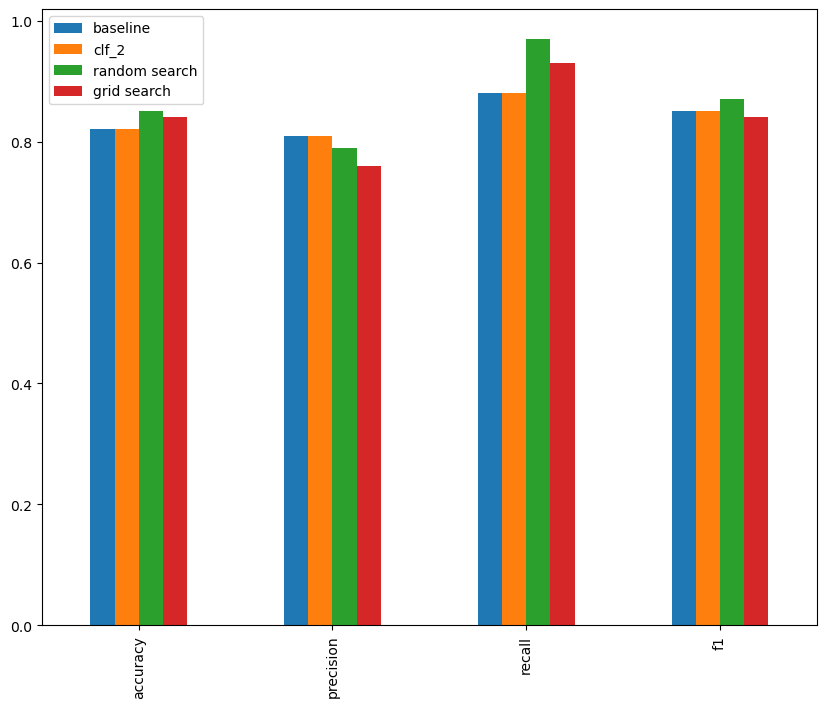

In [131]:
compare_metrics.plot.bar(figsize =(10,8));



## Saving an loading models
1. with pythond `pickle` module
2. with the `joblib` module 

In [135]:
import pickle

# saving an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model.pk1","wb")) #write binary 

In [164]:
# loading a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pk1", "rb")) #read binary 
loaded_pickle_model


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 200, 500]},
             verbose=2)

In [105]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [160]:
#save model using joblib
from joblib import dump , load
dump(gs_clf, filename= "gs_random_forest_model.joblib")

['gs_random_forest_model.joblib']

In [162]:
#load model using joblib
load("gs_random_forest_model.joblib")

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 200, 500]},
             verbose=2)

In [166]:
## Putting it all together

In [23]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## *Youtube video SVR


In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")


In [13]:
df = pd.read_csv("car-sales-extended.csv")

In [15]:
df.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [21]:
#renamek coloumn s 
df = df.rename(columns={
    "Make" : "Brand",
    "Colour" : "Color", 
    "Odometer (KM)" : "Odometer (km)", 
    "Doors" : "Door",
    "Price" : "price"
})

In [39]:
#chekc the index with duplicates 
df.loc[df.duplicated(subset= ["Brand"])]

,Brand,Color,Odometer (km),Door,price
2,Honda,White,84714,4,28343
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [59]:
df.query("Brand == 'Honda'")


,Brand,Color,Odometer (km),Door,price
0,Honda,White,35431,4,15323
2,Honda,White,84714,4,28343
5,Honda,Red,42652,4,23883
7,Honda,White,43120,4,20306
9,Honda,Blue,51029,4,26683
...,...,...,...,...,...
986,Honda,White,71934,4,26882
987,Honda,White,215235,4,3825
991,Honda,Blue,235985,4,9184
992,Honda,Green,54721,4,27419


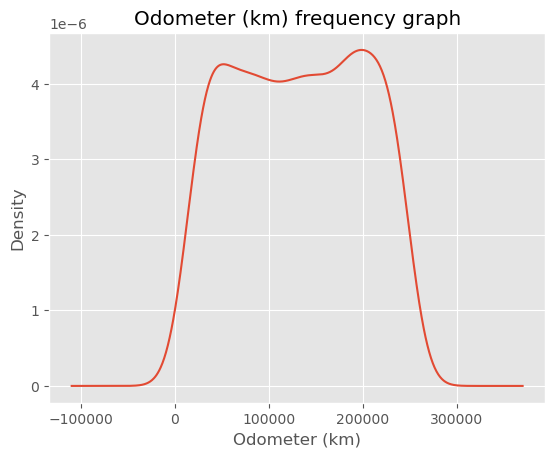

In [69]:
ax = df["Odometer (km)"].plot(kind = "kde",#kernel denisity plot
                        title = "Odometer (km) frequency graph"
                        )
ax.set_xlabel("Odometer (km)");


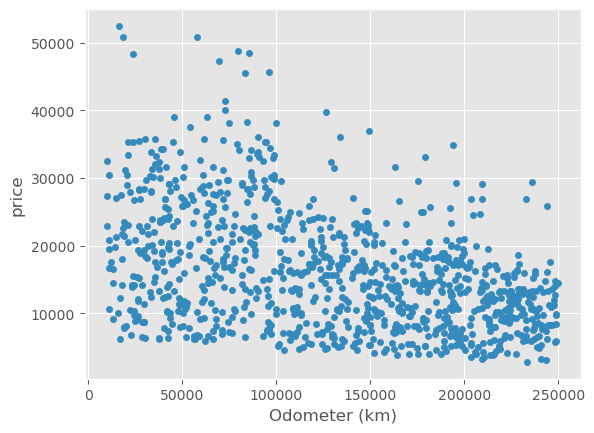

In [94]:
df.plot(kind="scatter",y = "price", x ="Odometer (km)");


<Axes: xlabel='Odometer (km)', ylabel='price'>

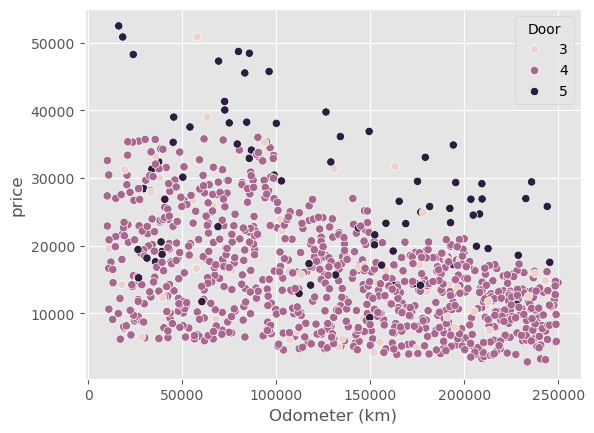

In [98]:
sns.scatterplot(y = "price", x ="Odometer (km)", data = df, hue ="Door")

In [278]:
df

,actual values,predicted values,difference
0,0.47700,0.493900,0.016900
1,0.45800,0.754940,0.296940
2,5.00001,4.928596,-0.071414
3,2.18600,2.540240,0.354240
4,2.78000,2.331760,-0.448240
...,...,...,...
4123,2.63300,2.219830,-0.413170
4124,2.66800,1.947760,-0.720240
4125,5.00001,4.836378,-0.163632
4126,0.72300,0.717820,-0.005180


In [276]:
df_corr = df[["Odometer (km)", "price"]].corr()
df_corr

KeyError: "None of [Index(['Odometer (km)', 'price'], dtype='object')] are in the [columns]"

<Axes: >

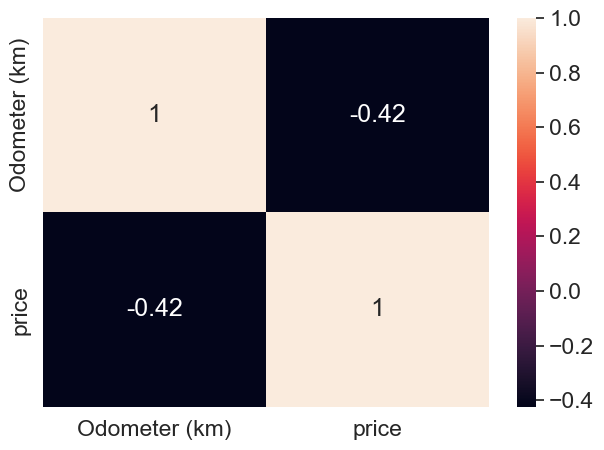

In [190]:
sns.heatmap(df_corr, annot =True)